<a href="https://colab.research.google.com/github/alexgualberto/GST24/blob/main/FINAN%C3%87AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDA - SERIES TEMPORAIS FINANÇAS

## IMPORTANDO OS DADOS E LIBS


In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

Criar o dataset com as ações que eu quero analisar

In [ ]:
acao = ["VALE3.SA","ITSA4.SA","PETR4.SA","HASH11.SA"]

In [ ]:
df = pd.DataFrame()
for i in acao:
    df[i] = yf.download(i, start='2015-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,VALE3.SA,ITSA4.SA,PETR4.SA,HASH11.SA
Date,,,,
2015-01-02,21.280001,5.606873,9.36,NaN
2015-01-05,20.959999,5.625216,8.56,NaN
2015-01-06,21.799999,5.668017,8.28,NaN
2015-01-07,22.600000,5.882019,8.67,NaN
2015-01-08,22.840000,5.943163,9.23,NaN


In [ ]:
df.tail()

,VALE3.SA,ITSA4.SA,PETR4.SA,HASH11.SA
Date,,,,
2024-06-20,61.400002,9.80,36.500000,54.130001
2024-06-21,60.830002,9.68,36.689999,53.959999
2024-06-24,60.900002,9.88,37.060001,49.750000
2024-06-25,60.650002,9.90,37.029999,52.400002
2024-06-26,61.400002,9.85,37.090000,51.980000


In [ ]:
missing_data = df.isna().sum()
missing_data

VALE3.SA        0
ITSA4.SA        0
PETR4.SA        0
HASH11.SA    1566
dtype: int64

Observa-se que a ação HASH11 não estava sendo vendida em bolsa no começo da apuração desse dataset .

Curiosidade sobre a carteira HASH :  

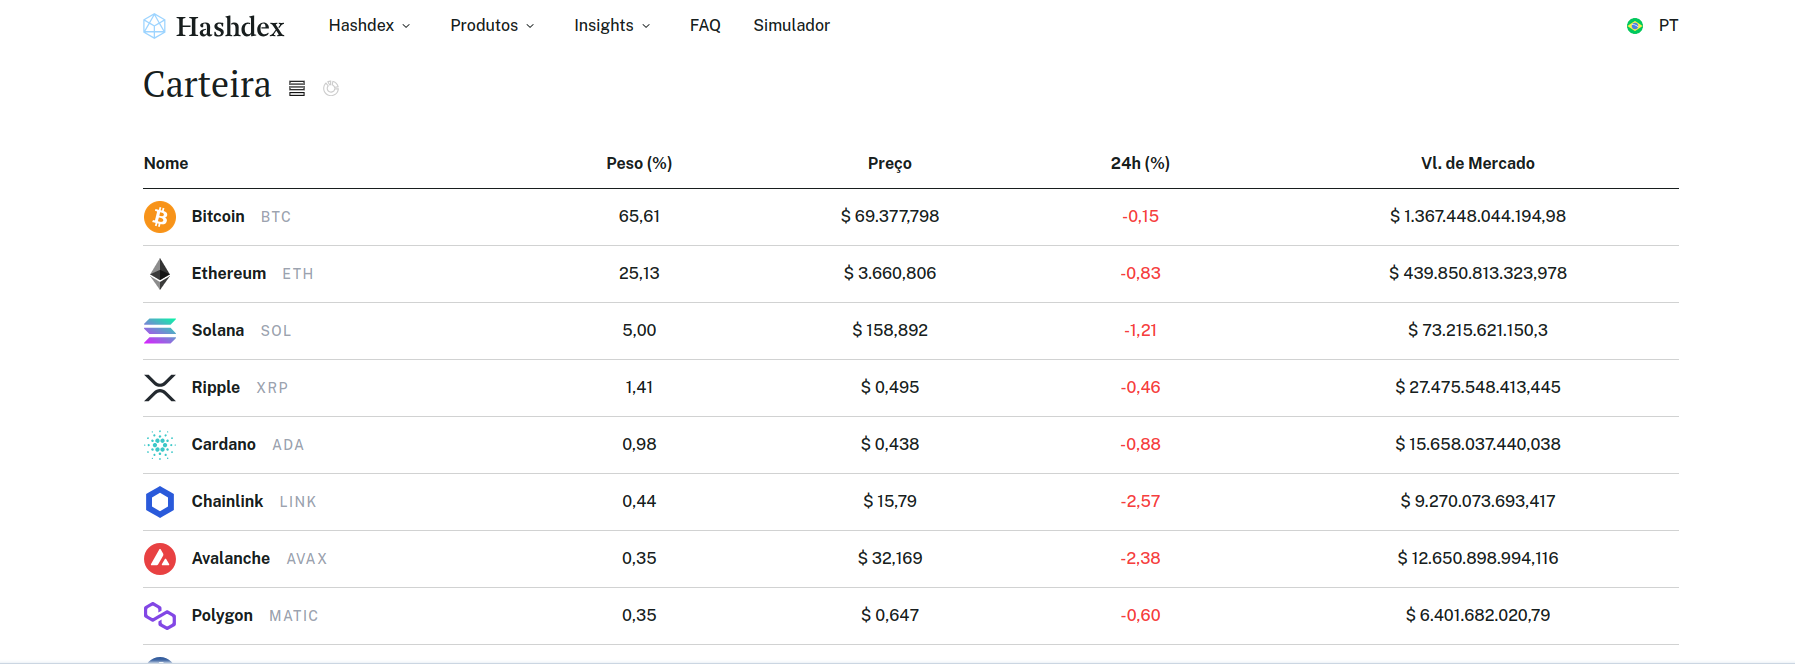

#### Algumas visualizações básicas

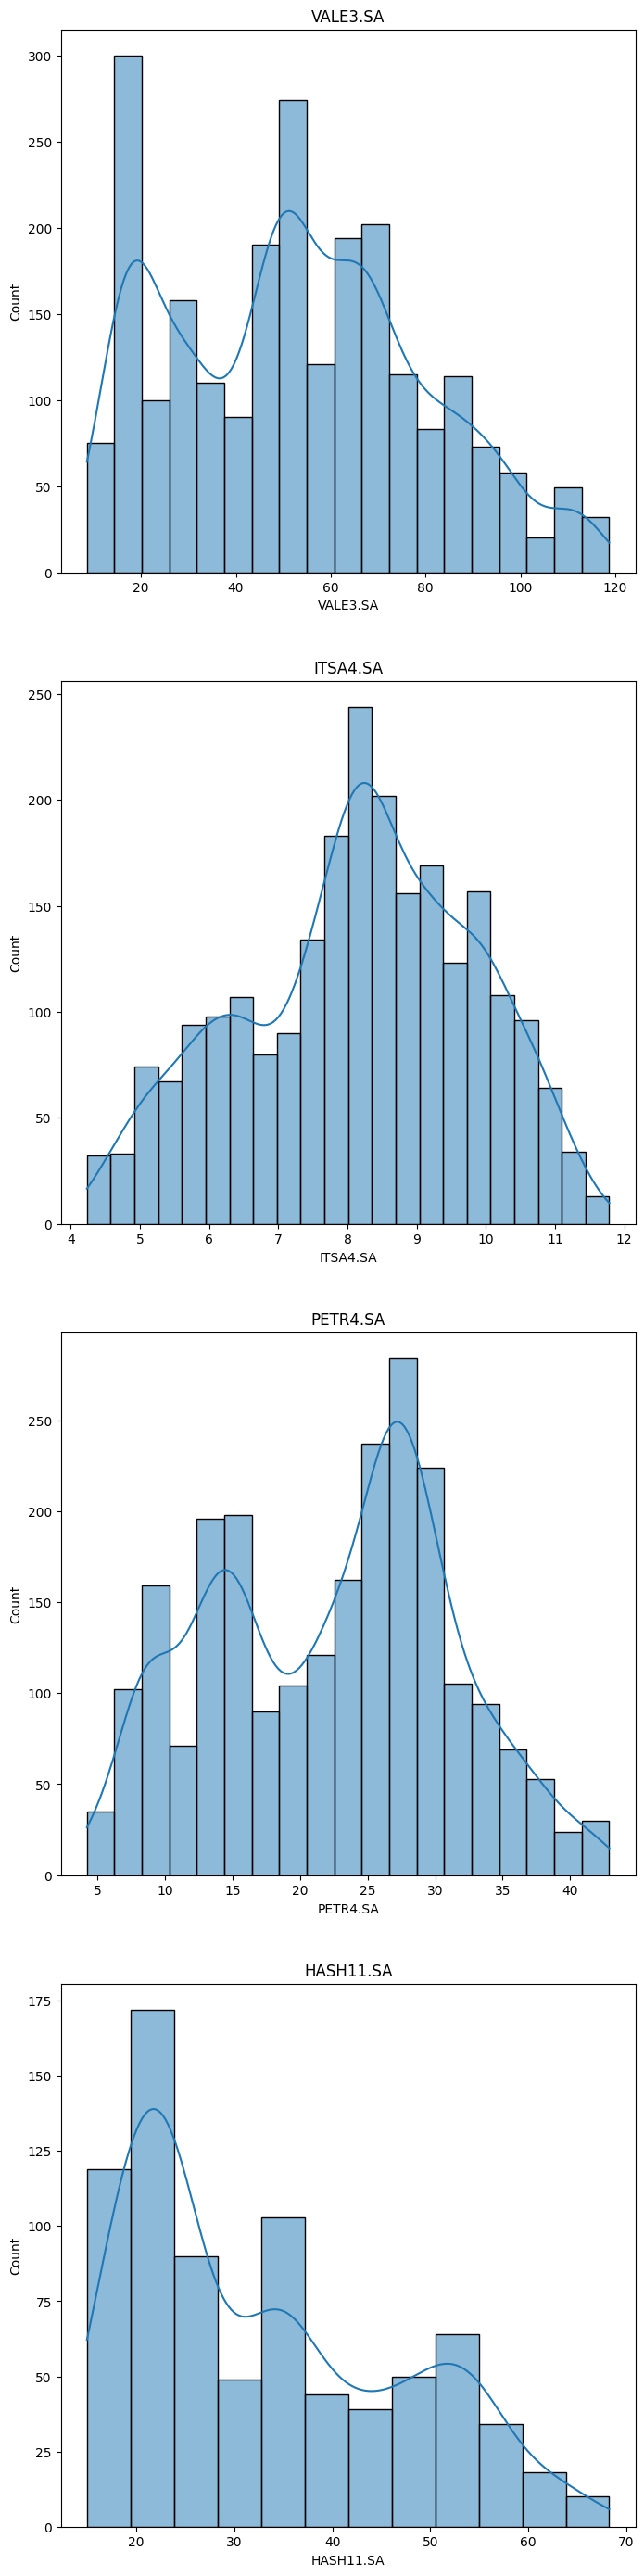

In [ ]:
len(df.columns)
np.arange(0, len(df.columns))
plt.figure(figsize=(8,35))
i = 1
for i in np.arange(0, len(df.columns)):
  plt.subplot(4, 1, i + 1)
  sns.histplot(df[df.columns[i]], kde = True)
  plt.title(df.columns[i])

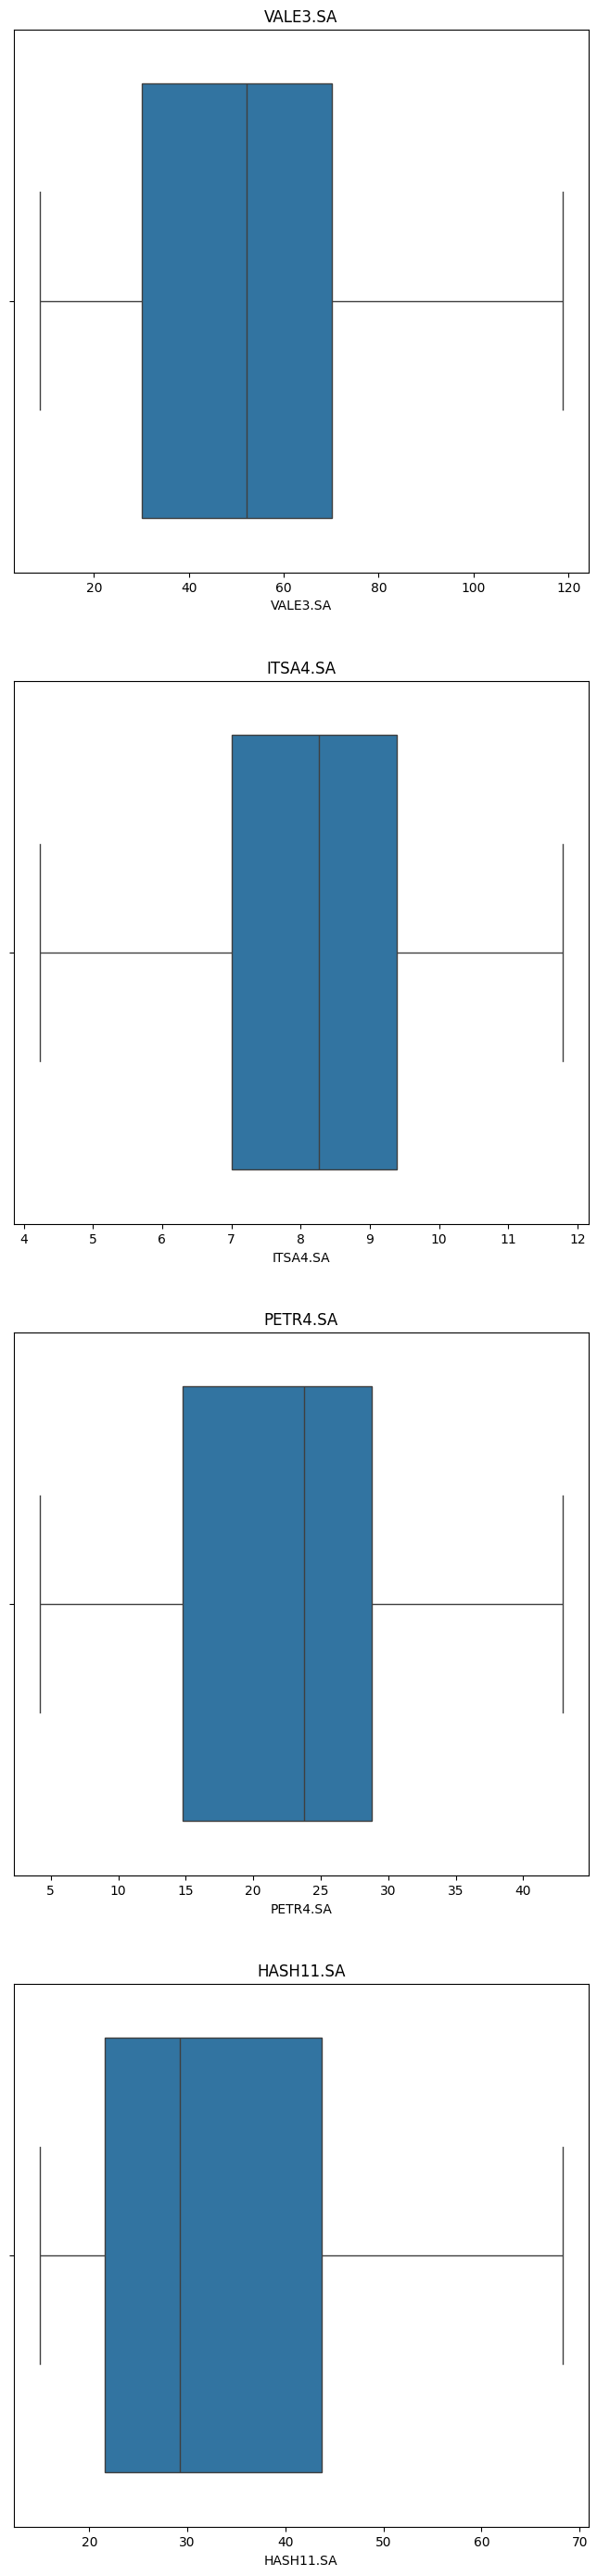

In [ ]:
plt.figure(figsize=(8,35))
i = 0
for i in np.arange(0, len(df.columns)):
  plt.subplot(4, 1, i + 1)
  sns.boxplot(x = df[df.columns[i]])
  plt.title(df.columns[i])

In [ ]:
df.head()

,VALE3.SA,ITSA4.SA,PETR4.SA,HASH11.SA
Date,,,,
2015-01-02,21.280001,5.606873,9.36,NaN
2015-01-05,20.959999,5.625216,8.56,NaN
2015-01-06,21.799999,5.668017,8.28,NaN
2015-01-07,22.600000,5.882019,8.67,NaN
2015-01-08,22.840000,5.943163,9.23,NaN


In [ ]:
df_1 = df.copy()

In [ ]:
df_1.reset_index(inplace=True)

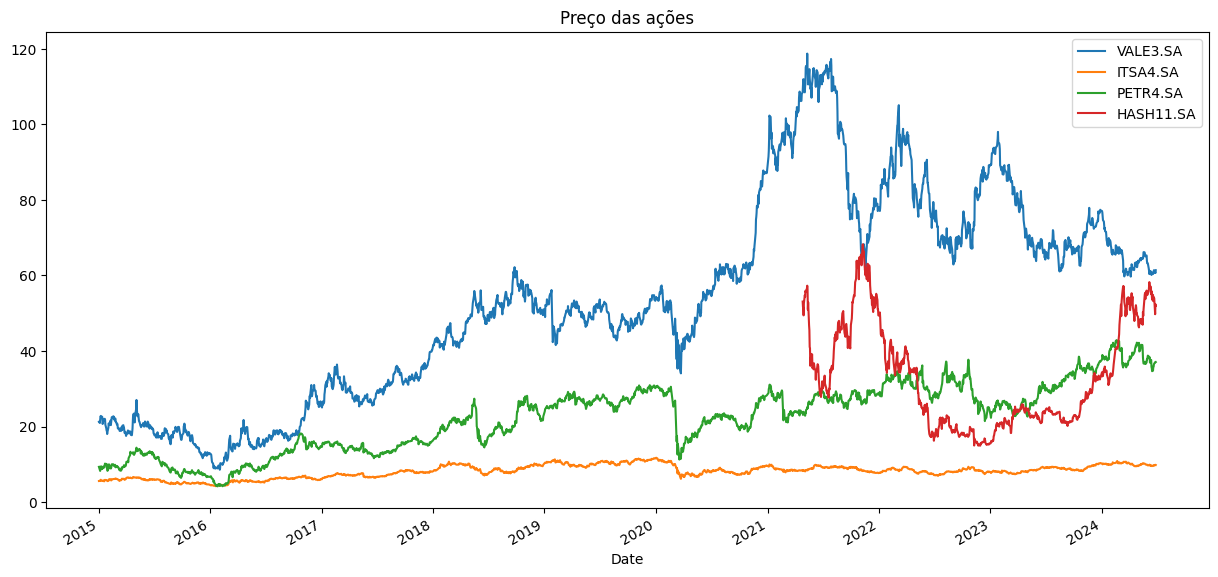

In [ ]:
df_1.plot(x = 'Date', figsize = (15,7), title = 'Preço das ações');

SUGESTÕES :

### PARTE 2

Normalizar o dataset para observar melhor o retorno

In [ ]:
dataset_normalizado = df_1.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [ ]:
dataset_normalizado.head()

,Date,VALE3.SA,ITSA4.SA,PETR4.SA,HASH11.SA
0,2015-01-02,1.000000,1.000000,1.000000,NaN
1,2015-01-05,0.984962,1.003272,0.914530,NaN
2,2015-01-06,1.024436,1.010905,0.884615,NaN
3,2015-01-07,1.062030,1.049073,0.926282,NaN
4,2015-01-08,1.073308,1.059978,0.986111,NaN


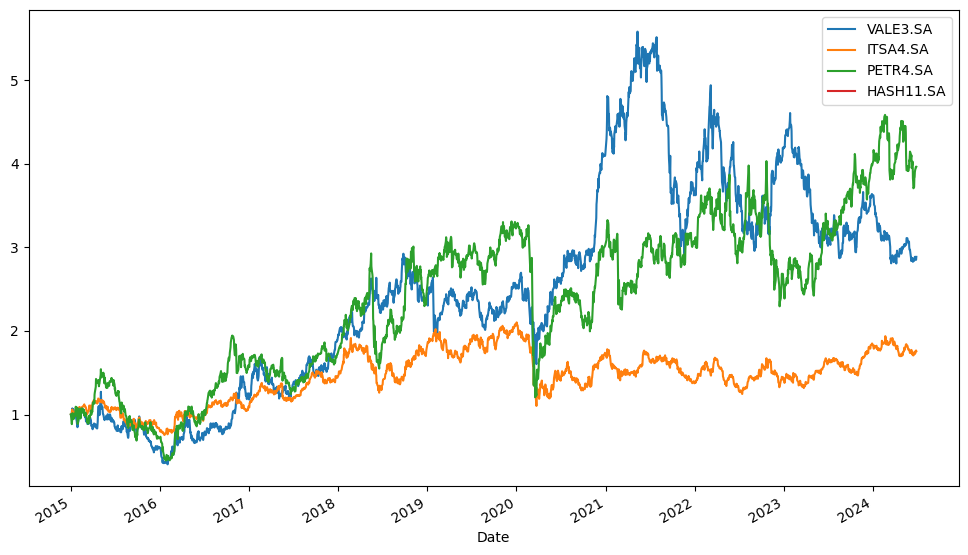

In [ ]:
dataset_normalizado.plot(x = 'Date', figsize=(12, 7));

#### Aplicando conhecimentos de Séries Temporais

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
dataset = pd.DataFrame()

dataset["MGLU3"] = yf.download(i, start='2021-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2021-04-26 to 2024-06-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MGLU3   792 non-null    float64
dtypes: float64(1)
memory usage: 12.4 KB


In [ ]:
time_series =dataset['MGLU3']

In [ ]:
time_series

Date
2021-04-26    53.099998
2021-04-27    51.660000
2021-04-28    51.599998
2021-04-29    49.450001
2021-04-30    52.650002
                ...    
2024-06-20    54.130001
2024-06-21    53.959999
2024-06-24    49.750000
2024-06-25    52.400002
2024-06-26    51.980000
Name: MGLU3, Length: 792, dtype: float64

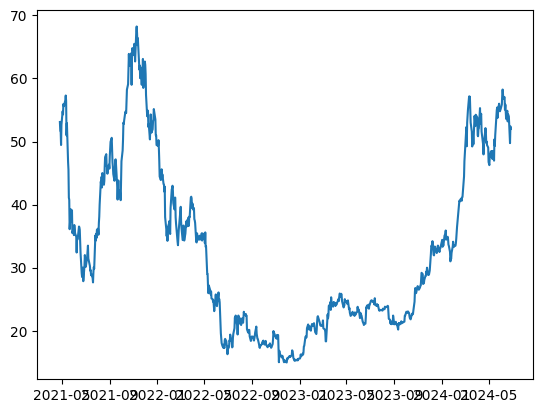

In [ ]:
plt.plot(time_series)

In [ ]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [ ]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

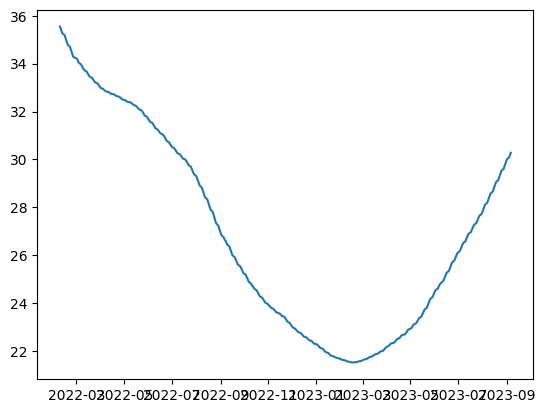

In [ ]:
plt.plot(tendencia);

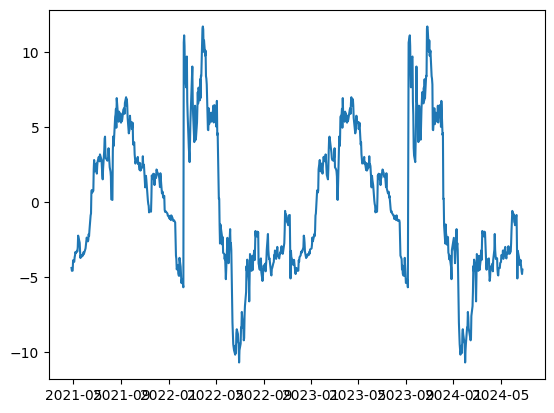

In [ ]:
plt.plot(sazonal);

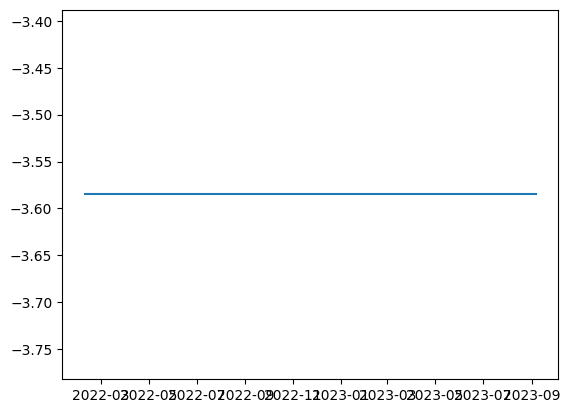

In [ ]:
plt.plot(aleatorio);

#### AUTO ARIMA

In [ ]:
len(time_series)

792

In [ ]:
treinamento = time_series[:732]
treinamento.shape

(732,)

In [ ]:
teste = time_series[732:]
teste.shape

(60,)

In [ ]:
modelo = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')
modelo.order

(2, 1, 2)

In [ ]:
previsoes = pd.DataFrame(modelo.predict(n_periods=60).values, index=teste.index)
previsoes.columns = ['previsoes']
previsoes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,previsoes
Date,
2024-04-02,53.924631
2024-04-03,53.952541
2024-04-04,54.026739
2024-04-05,54.049341
2024-04-08,54.107527
2024-04-09,54.125810
2024-04-10,54.171446
2024-04-11,54.186219
2024-04-12,54.222017


In [ ]:
teste

Date
2024-04-02    51.000000
2024-04-03    50.840000
2024-04-04    52.000000
2024-04-05    52.080002
2024-04-08    55.299999
2024-04-09    52.849998
2024-04-10    54.049999
2024-04-11    54.400002
2024-04-12    51.599998
2024-04-15    49.990002
2024-04-16    49.500000
2024-04-17    47.959999
2024-04-18    50.310001
2024-04-19    50.230000
2024-04-22    52.130001
2024-04-23    51.500000
2024-04-24    49.799999
2024-04-25    50.000000
2024-04-26    49.439999
2024-04-29    49.049999
2024-04-30    46.750000
2024-05-02    46.259998
2024-05-03    47.619999
2024-05-06    48.450001
2024-05-07    48.080002
2024-05-08    47.480000
2024-05-09    48.500000
2024-05-10    47.220001
2024-05-13    48.500000
2024-05-14    46.970001
2024-05-15    50.349998
2024-05-16    49.299999
2024-05-17    50.970001
2024-05-20    54.099998
2024-05-21    54.959999
2024-05-22    55.400002
2024-05-23    53.750000
2024-05-24    54.959999
2024-05-27    56.000000
2024-05-28    55.189999
2024-05-29    54.799999
2024-05-31 

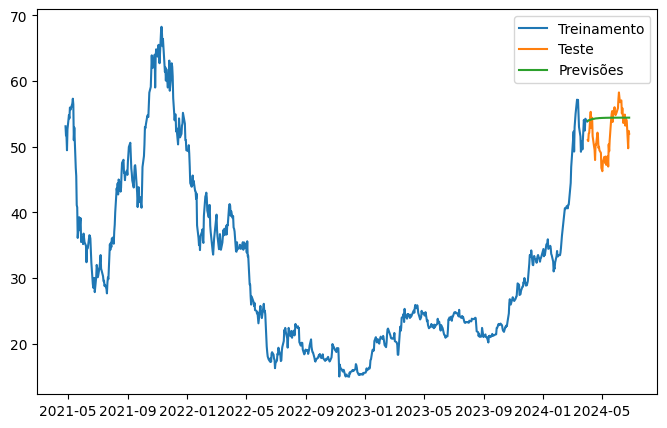

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

#### Métricas

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(teste, previsoes)
mae = mean_absolute_error(teste, previsoes)
mape = mean_absolute_percentage_error(teste, previsoes)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 14.434773709822014
Mean Absolute Error (MAE): 3.021071207387694
Mean Absolute Percentage Error (MAPE): 0.060413791683106004


#### PROPHET

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
dataset

,MGLU3
Date,
2021-04-26,53.099998
2021-04-27,51.660000
2021-04-28,51.599998
2021-04-29,49.450001
2021-04-30,52.650002
...,...
2024-06-20,54.130001
2024-06-21,53.959999
2024-06-24,49.750000


In [ ]:
dataset = dataset.reset_index()

In [ ]:
dataset.head()

,Date,MGLU3
0,2021-04-26,53.099998
1,2021-04-27,51.660000
2,2021-04-28,51.599998
3,2021-04-29,49.450001
4,2021-04-30,52.650002


In [ ]:
dataset = dataset[['Date', 'MGLU3']].rename(columns = {'Date': 'ds', 'MGLU3': 'y'})
dataset

,ds,y
0,2021-04-26,53.099998
1,2021-04-27,51.660000
2,2021-04-28,51.599998
3,2021-04-29,49.450001
4,2021-04-30,52.650002
...,...,...
787,2024-06-20,54.130001
788,2024-06-21,53.959999
789,2024-06-24,49.750000
790,2024-06-25,52.400002


In [ ]:
modelo = Prophet()
modelo.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpffuvstc3/dhhdrdww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpffuvstc3/b3rv9qwd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76982', 'data', 'file=/tmp/tmpffuvstc3/dhhdrdww.json', 'init=/tmp/tmpffuvstc3/b3rv9qwd.json', 'output', 'file=/tmp/tmpffuvstc3/prophet_modely4mk1h1z/prophet_model-20240627141223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = modelo.make_future_dataframe(periods=60)
previsoes = modelo.predict(future)

In [ ]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-26,42.359567,40.064684,49.447796,42.359567,42.359567,2.434929,2.434929,2.434929,-2.082447,-2.082447,-2.082447,4.517376,4.517376,4.517376,0.0,0.0,0.0,44.794496
1,2021-04-27,42.385036,40.372653,49.407512,42.385036,42.385036,2.373628,2.373628,2.373628,-2.186973,-2.186973,-2.186973,4.560601,4.560601,4.560601,0.0,0.0,0.0,44.758664
2,2021-04-28,42.410505,40.268573,50.011363,42.410505,42.410505,2.653575,2.653575,2.653575,-1.928218,-1.928218,-1.928218,4.581793,4.581793,4.581793,0.0,0.0,0.0,45.064081
3,2021-04-29,42.435974,40.342594,49.506402,42.435974,42.435974,2.561160,2.561160,2.561160,-2.017445,-2.017445,-2.017445,4.578605,4.578605,4.578605,0.0,0.0,0.0,44.997134
4,2021-04-30,42.461443,40.332791,49.677014,42.461443,42.461443,2.364389,2.364389,2.364389,-2.184834,-2.184834,-2.184834,4.549224,4.549224,4.549224,0.0,0.0,0.0,44.825833


In [ ]:
len(dataset), len(previsoes)

(792, 852)

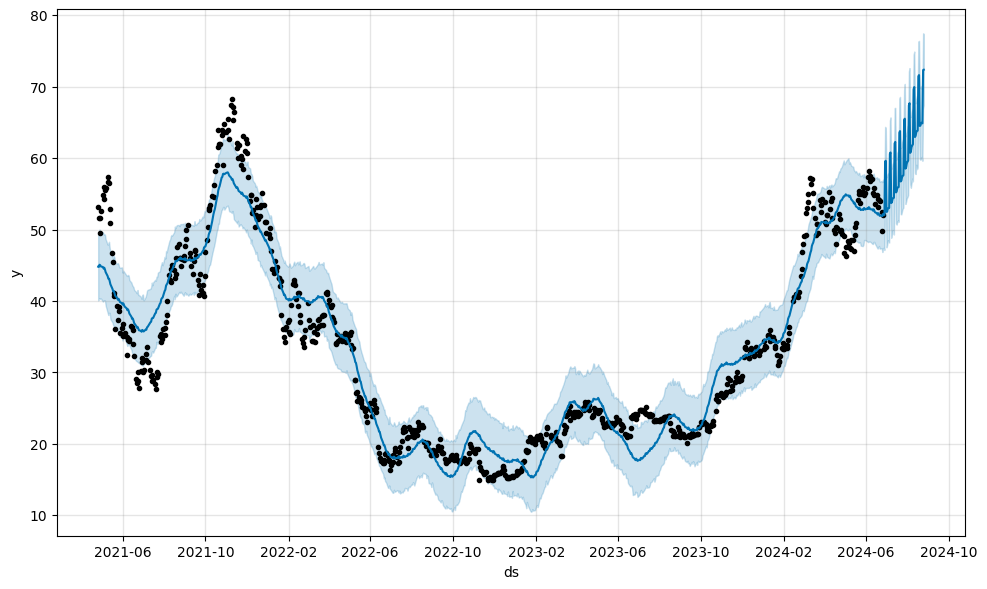

In [ ]:
modelo.plot(previsoes);

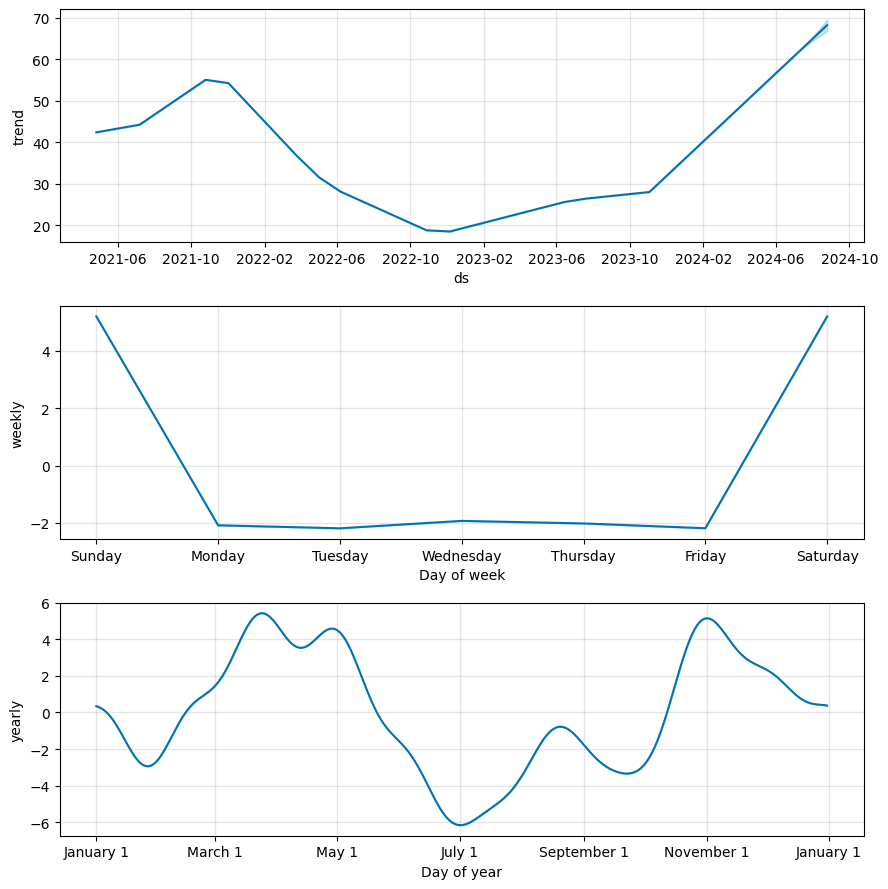

In [ ]:
modelo.plot_components(previsoes);

In [ ]:
teste = dataset[732:]
teste.shape

(60, 2)

In [ ]:
predict = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(predict)

In [ ]:
previsoes = previsoes['yhat'].tail(60)

In [ ]:
teste['y'].shape , previsoes.shape

((60,), (60,))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(teste['y'], previsoes)
mae = mean_absolute_error(teste['y'], previsoes)
mape = mean_absolute_percentage_error(teste['y'], previsoes)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 14.741011472320132
Mean Absolute Error (MAE): 3.2229470003351404
Mean Absolute Percentage Error (MAPE): 0.06324349493848948
